# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename) 

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Census data set (censusData.csv).
2. Predicting whether an individual earns more than $60,000 per year. The label is income level (binary: >$60,000 or ≤$60,000).

4. This is a supervised learning problem. The dataset includes information about individuals and their income levels (whether they earn more than $60,000 annually). The model is trained on this labeled data to learn the relationship between the features (age, education, occupation, etc.) and the income level. It is a classification problem, specifically binary classification where we aim to classify individuals into one of two categories based on their features: those who earn more than $60,000 per year and those who do not. The two binary classifications would be individuals who earn more than $60,000 per year (positive class) and individuals who earn $60,000 or less per year (negative class).
5. The features are age, education, occupation, marital status, and other relevant socioeconomic factors.
6. Predicting income levels based on factors like age, education, and job can help companies and policymakers understand what influences people's earnings. For companies, can use this information to create products and services that better meet the needs of different income groups, leading to better marketing and happier customers. Policymakers can design programs and policies that help reduce income differences and support people in moving up the economic ladder. This means creating fairer and more effective support systems for everyone.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


/tmp/ipykernel_1987/1892383502.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


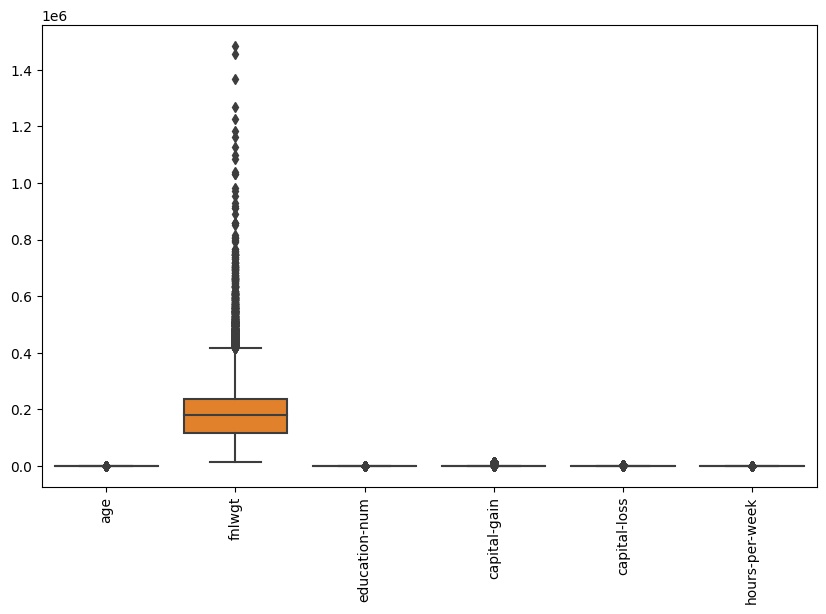

Data after one-hot encoding:
    age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  39.0   77516             13          2174             0            40.0   
1  50.0   83311             13             0             0            13.0   
2  38.0  215646              9             0             0            40.0   
3  53.0  234721              7             0             0            40.0   
4  28.0  338409             13             0             0            40.0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                    0                       0                  0   
1                    0                       0                  0   
2                    0                       0                  1   
3                    0                       0                  1   
4                    0                       0                  1   

   workclass_Self-emp-inc  ...  native-country_Puerto-Rico  \
0                       0

In [3]:

df.info()

df.describe()

df.isnull().sum()


df.fillna(df.mean(), inplace=True)
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()

df = pd.get_dummies(df, drop_first=True)
print("Data after one-hot encoding:")
print(df.head())

#Part 2: Machine Learning Model Selection

target_column = 'income_binary_>50K'
X = df.drop(target_column, axis=1)
y = df[target_column]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


#Part 3: Model Evaluation and Improvement


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_train_scaled, X_test_scaled = train_test_split(X_res_scaled, test_size=0.2, random_state=42)


model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)

print("Accuracy (scaled):", accuracy_score(y_test, y_pred_scaled))
print("Classification Report (scaled):\n", classification_report(y_test, y_pred_scaled))

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. age education occupation marital_status

2. Some data preparation would involve addressing the missing numerical values with the mean and even the categorical values with the most common value. Another would be finding or replacing the outliers and detecting them for numerical features. I could also rename the features and label so that its easier to use and understand. I would also ensure that the class distribution in the dataset is balanced and address the imbalance.

3. For this kind of binary classificaton problem, I would say models like these would be the most suitable: Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, Support Vector Machines (SVM)

4. So the plan would be to prepare the data by splitting the data and training and testing the different sets. Then I would train them using the multiple models and evaluate each model's performance using metrics such as accuracy, precision, recall, or even the ROC, AUC score. Then I would choose the best-performing model and use grid search or random search to find the best hyperparameters for the selected models. We also have to make sure to use cross-validation so that the model is settled well into the new data. Then we would perform the feature selection techniques to identify and obtain the most important features and so that it could make the model performance better. To make the model improved we could also refine and experiment with different algorithms, techniques and parameters tbo enhance the performance

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


/tmp/ipykernel_1987/1884780841.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


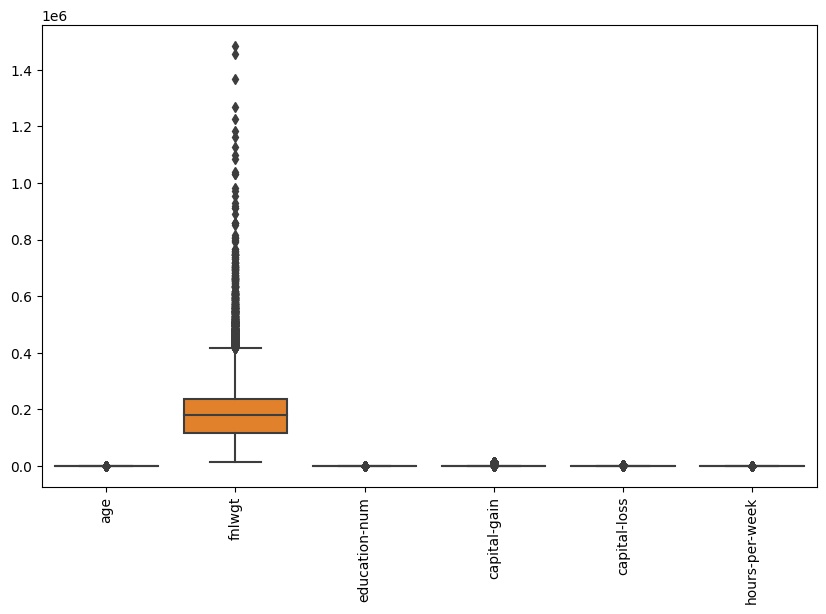

Data after one-hot encoding:
    age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  39.0   77516             13          2174             0            40.0   
1  50.0   83311             13             0             0            13.0   
2  38.0  215646              9             0             0            40.0   
3  53.0  234721              7             0             0            40.0   
4  28.0  338409             13             0             0            40.0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                    0                       0                  0   
1                    0                       0                  0   
2                    0                       0                  1   
3                    0                       0                  1   
4                    0                       0                  1   

   workclass_Self-emp-inc  ...  native-country_Puerto-Rico  \
0                       0

In [5]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


censusDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
df = pd.read_csv(censusDataSet_filename)

df.head()

# show the basic information
df.info()

# summary statistics 
df.describe()

# Check for missing values
df.isnull().sum()

# Fill missing values with the mean 
df.fillna(df.mean(), inplace=True)
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# use box plots to visualize outliers 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()
# Perform one-hot encoding on categorical features
df = pd.get_dummies(df, drop_first=True)
print("Data after one-hot encoding:")
print(df.head())


target_column = 'income_binary_>50K'
X = df.drop(target_column, axis=1)
y = df[target_column]

# use smote for the imbalance 
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Scale the data if necessary
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_train_scaled, X_test_scaled = train_test_split(X_res_scaled, test_size=0.2, random_state=42)

# Train and evaluate the model again with scaled data
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)

print("Accuracy (scaled):", accuracy_score(y_test, y_pred_scaled))
print("Classification Report (scaled):\n", classification_report(y_test, y_pred_scaled))



